# Barin and subtypes

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import time
import os
import pickle
import sys
from importlib import reload


from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from utils import CancerType

## First iteration label subgroups

Load data

In [3]:
brain = CancerType('Brain')

In [4]:
brain.countSubtypes()

[['93803' 159]
 ['93823' 162]
 ['93913' 49]
 ['94003' 160]
 ['94013' 179]
 ['94403' 1646]
 ['94503' 221]
 ['94513' 105]
 ['94733' 82]]


```
9380/3: Glioma, malignant
9382/3: Mixed glioma (Anaplastic oligoastrocytoma, Oligoastrocytoma)
9391/3: Ependymoma
9400/3: Astrocytoma
9401/3: Astrocytoma, anaplastic
9440/3: Glioblastoma
9450/3: Oligodendroglioma
9451/3: Oligodendroglioma, anaplastic
9473/3: Primitive neuroectodermal tumor
 ```

In [7]:
code_remap = {
    '93803': 'Glioma',
    '93823': 'Mixed glioma',
    '93913': 'Ependymoma',
    '94003': 'Astrocytoma',
    '94013': 'Astrocytoma anaplastic',
    '94403': 'Glioblastoma',
    '94503': 'Oligodendroglioma',
    '94513': 'Oligodendroglioma anaplastic',
    '94733': 'Primitive neuroectodermal tumor',
}

In [9]:
brain.relabel(code_remap)

In [11]:
brain.countSubtypes()

[['Astrocytoma' 160]
 ['Astrocytoma anaplastic' 179]
 ['Ependymoma' 49]
 ['Glioblastoma' 1646]
 ['Glioma' 159]
 ['Mixed glioma' 162]
 ['Oligodendroglioma' 221]
 ['Oligodendroglioma anaplastic' 105]
 ['Primitive neuroectodermal tumor' 82]]


PCA done! Time elapsed: 0.3331780433654785 seconds
Cumulative explained variation for 50 principal components: 0.911635832257107
t-SNE done! Time elapsed: 31.584134817123413 seconds


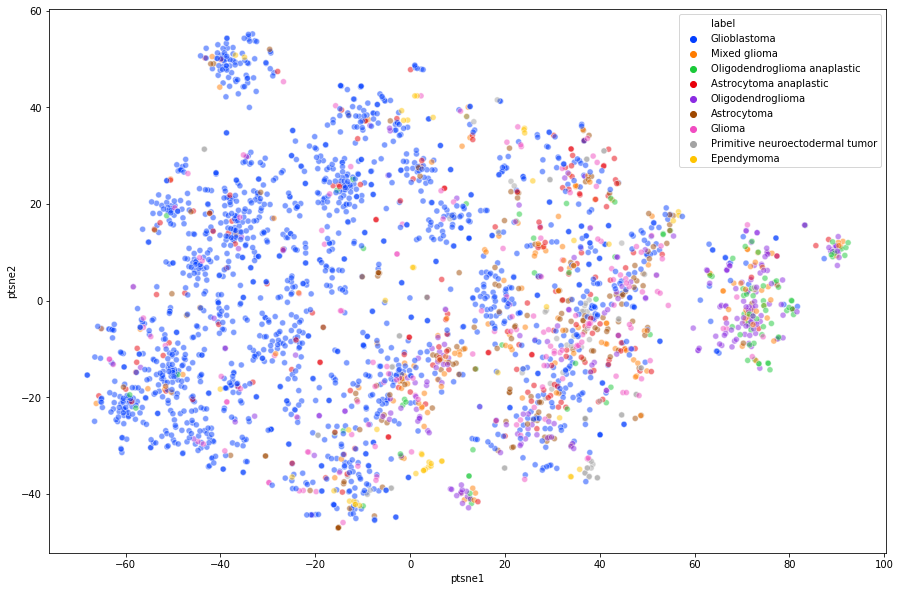

In [12]:
brain.pcaTSNE()

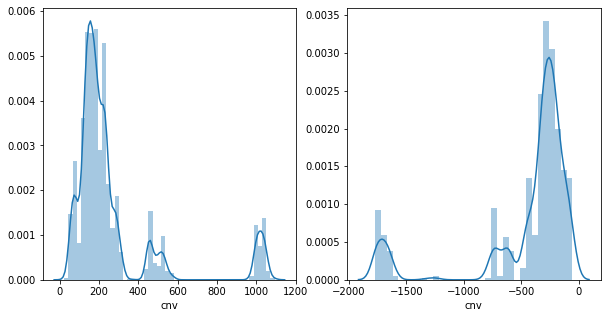

In [13]:
brain.groupData()

In [14]:
brain.analyze([900, 400, -1500, -530])
brain.dumpFiles()

In [15]:
brain.countData()

amp_genes	(366, 9)
del_genes	(148, 9)
genes	366
high_amp_genes	(181, 9)
low_amp_genes	(185, 9)
high_del_genes	(72, 9)
low_del_genes	(76, 9)
high_amp_census	(7, 9)
low_amp_census	(6, 9)
amp_census	(13, 9)
high_del_census	(3, 9)
low_del_census	(6, 9)
del_census	(9, 9)
census	22


### Glioma: 9380/3

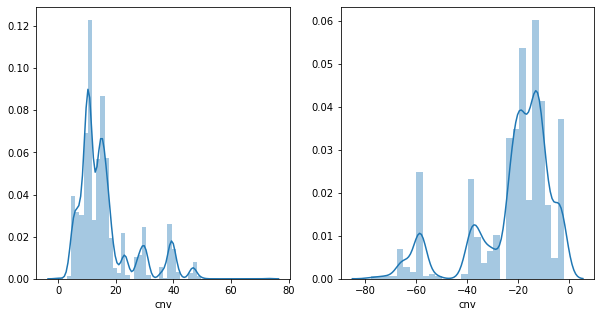

In [16]:
subtype = 'Glioma'
brain.prepareSubtype(subtype)

In [17]:
brain.analyzeSubtype(subtype,[30,20, -50,-30])
brain.dumpSubtypeFiles(subtype)

### Mixed glioma: 9382/3

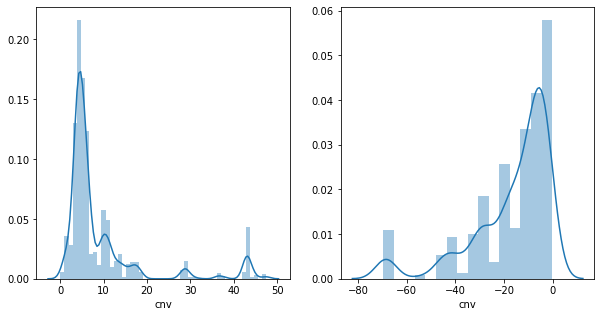

In [18]:
subtype = 'Mixed glioma'
brain.prepareSubtype(subtype)

In [19]:
brain.analyzeSubtype(subtype,[20,9, -60,-25])
brain.dumpSubtypeFiles(subtype)

### Ependymoma: 9391/3

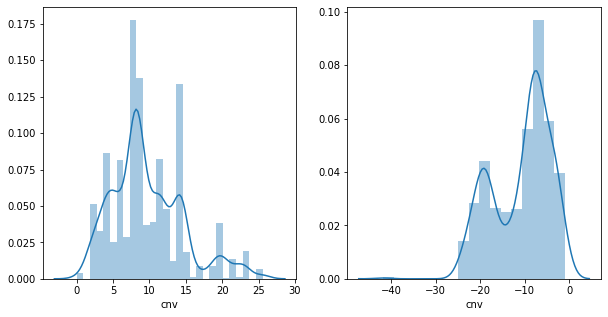

In [20]:
subtype = 'Ependymoma'
brain.prepareSubtype(subtype)

In [21]:
brain.analyzeSubtype(subtype,[16,13, -30,-15])
brain.dumpSubtypeFiles(subtype)

### Astrocytoma: 9400/3

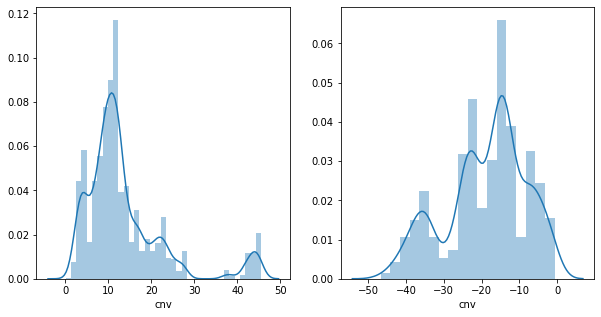

In [22]:
subtype = 'Astrocytoma'
brain.prepareSubtype(subtype)

In [23]:
brain.analyzeSubtype(subtype,[31,19, -30,-20])
brain.dumpSubtypeFiles(subtype)

### Astrocytoma anaplastic: 9401/3

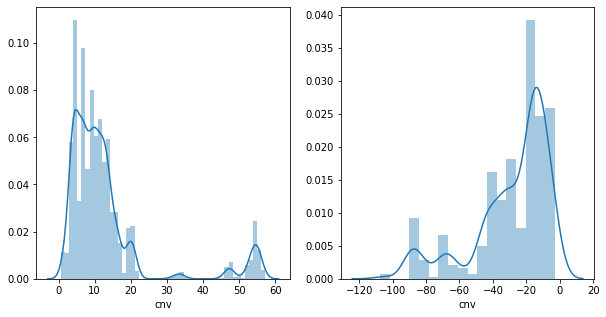

In [24]:
subtype = 'Astrocytoma anaplastic'
brain.prepareSubtype(subtype)

In [25]:
brain.analyzeSubtype(subtype,[40,19, -60,-25])
brain.dumpSubtypeFiles(subtype)

### Glioblastoma: 9440/3

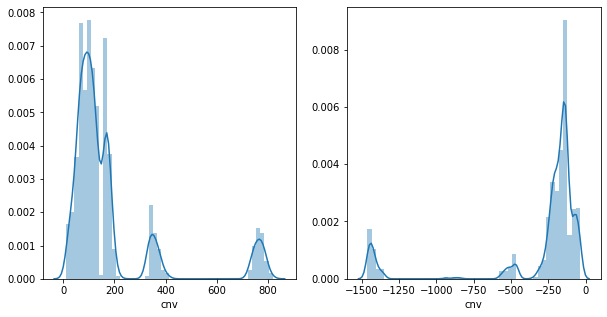

In [26]:
subtype = 'Glioblastoma'
brain.prepareSubtype(subtype)

In [27]:
brain.analyzeSubtype(subtype,[600,250, -750,-350])
brain.dumpSubtypeFiles(subtype)

### Oligodendroglioma: 9450/3

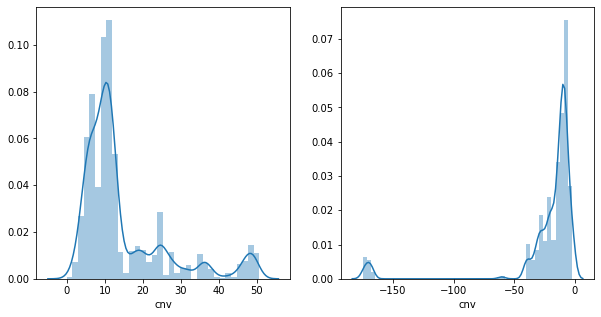

In [28]:
subtype = 'Oligodendroglioma'
brain.prepareSubtype(subtype)

In [29]:
brain.analyzeSubtype(subtype,[35,15, -100,-50])
brain.dumpSubtypeFiles(subtype)

### Oligodendroglioma anaplastic: 9451/3

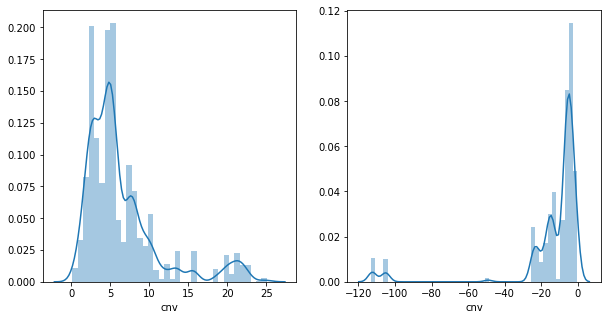

In [30]:
subtype = 'Oligodendroglioma anaplastic'
brain.prepareSubtype(subtype)

In [31]:
brain.analyzeSubtype(subtype,[15,6, -40,-10])
brain.dumpSubtypeFiles(subtype)

### Primitive neuroectodermal tumor: 9473/3

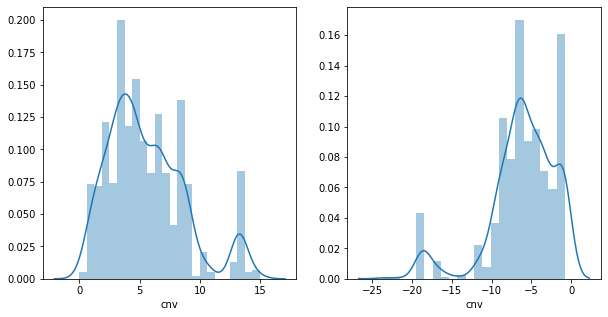

In [32]:
subtype = 'Primitive neuroectodermal tumor'
brain.prepareSubtype(subtype)

In [33]:
brain.analyzeSubtype(subtype,[12,7, -20,-15])
brain.dumpSubtypeFiles(subtype)

### Conclusion

After comparing signatures, merging:
- "Oligodendroglioma" and "Oligodendroglioma, anaplastic" as "Oligodendroglioma"
- "Astrocytoma" and "Astrocytoma, anaplastic" as "Astrocytoma"
- "Glioma" and "Glioblastoma" as "Glioma"

## Second interation of label subgroups

### Initialization of labels

In [5]:
brain = CancerType('Brain')

In [6]:
brain.countSubtypes()

[['93803' 159]
 ['93823' 162]
 ['93913' 49]
 ['94003' 160]
 ['94013' 179]
 ['94403' 1646]
 ['94503' 221]
 ['94513' 105]
 ['94733' 82]]


```
9380/3: Glioma, malignant
9382/3: Mixed glioma (Anaplastic oligoastrocytoma, Oligoastrocytoma)
9391/3: Ependymoma
9400/3: Astrocytoma
9401/3: Astrocytoma, anaplastic
9440/3: Glioblastoma
9450/3: Oligodendroglioma
9451/3: Oligodendroglioma, anaplastic
9473/3: Primitive neuroectodermal tumor
 ```

In [7]:
code_remap = {
    '93803': 'Glioma',
    '93823': 'Mixed glioma',
    '93913': 'Ependymoma',
    '94003': 'Astrocytoma',
    '94013': 'Astrocytoma',
    '94403': 'Glioma',
    '94503': 'Oligodendroglioma',
    '94513': 'Oligodendroglioma',
    '94733': 'Primitive neuroectodermal tumor',
}

In [8]:
brain.relabel(code_remap)

In [9]:
brain.countSubtypes()

[['Astrocytoma' 339]
 ['Ependymoma' 49]
 ['Glioma' 1805]
 ['Mixed glioma' 162]
 ['Oligodendroglioma' 326]
 ['Primitive neuroectodermal tumor' 82]]


### Glioma: 9380/3, 9440/3

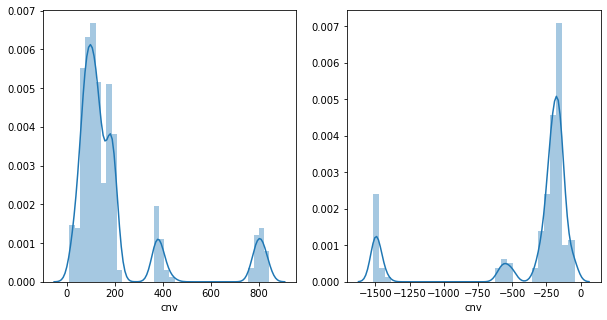

In [10]:
subtype = 'Glioma'
brain.prepareSubtype(subtype)

In [11]:
brain.analyzeSubtype(subtype,[600,250, -750,-350])
brain.dumpSubtypeFiles(subtype)

### Mixed glioma: 9382/3

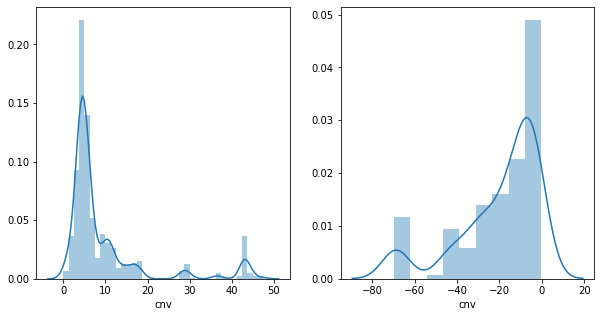

In [12]:
subtype = 'Mixed glioma'
brain.prepareSubtype(subtype)

In [13]:
brain.analyzeSubtype(subtype,[20,9, -60,-30])
brain.dumpSubtypeFiles(subtype)

### Ependymoma: 9391/3

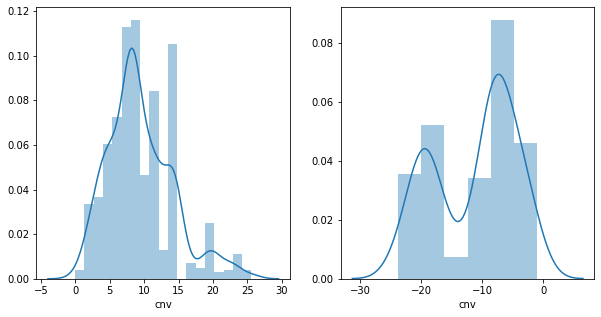

In [14]:
subtype = 'Ependymoma'
brain.prepareSubtype(subtype)

In [15]:
brain.analyzeSubtype(subtype,[16,13, -30,-15])
brain.dumpSubtypeFiles(subtype)

### Astrocytoma: 9400/3, 9401/3

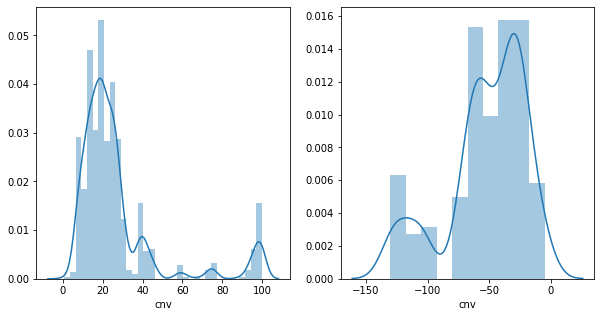

In [16]:
subtype = 'Astrocytoma'
brain.prepareSubtype(subtype)

In [17]:
brain.analyzeSubtype(subtype,[50,35, -75,-50])
brain.dumpSubtypeFiles(subtype)

### Oligodendroglioma: 9450/3, 9451/3

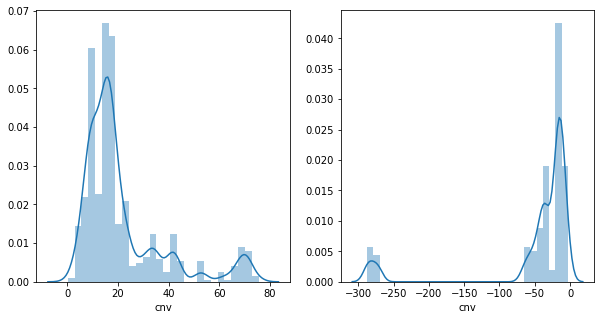

In [18]:
subtype = 'Oligodendroglioma'
brain.prepareSubtype(subtype)

In [19]:
brain.analyzeSubtype(subtype,[60,25, -100,-20])
brain.dumpSubtypeFiles(subtype)

### Primitive neuroectodermal tumor: 9473/3

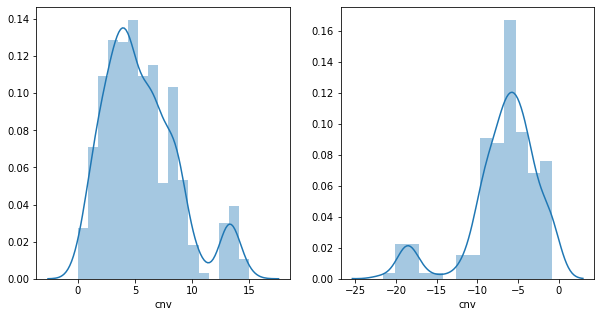

In [20]:
subtype = 'Primitive neuroectodermal tumor'
brain.prepareSubtype(subtype)

In [21]:
brain.analyzeSubtype(subtype,[12,7, -22,-15])
brain.dumpSubtypeFiles(subtype)

In [22]:
brain.dumpSubtypeCounts()